<a href="https://colab.research.google.com/github/BaoNguyen151654/Phising-URL-detection-model/blob/main/phising_link_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tldextract

In [2]:
!pip install scikit-optimize

In [3]:
import pandas as pd
import numpy as np
import tldextract
import re
from urllib.parse import urlparse, parse_qs
from sklearn.metrics import classification_report

df=pd.read_csv('/content/phishing_site_urls.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [4]:
df['URL length'] = df['URL'].str.len()
df['URL length'].head()

,URL length
0,225
1,81
2,177
3,60
4,116


In [5]:
def count_subdomains(url):
    try:
        extracted = tldextract.extract(url)
        if extracted.subdomain:
            return len(extracted.subdomain.split('.'))
        else:
            return 0
    except:
        return 0

df['Number of Subdomain'] = df['URL'].apply(count_subdomains)
df['Number of Subdomain'].head()

,Number of Subdomain
0,0
1,1
2,0
3,1
4,0


In [6]:
def count_dots_in_url(url):
    return url.count('.')
df['Number of dots in the URL'] = df['URL'].apply(count_dots_in_url)
df['Number of dots in the URL'].head()

,Number of dots in the URL
0,6
1,5
2,7
3,6
4,1


In [7]:
def count_subdirectories(url):
    parsed_url = urlparse(url)
    path = parsed_url.path.strip('/')
    if not path:
        return 0
    return path.count('/') + 1
df['Number of sub directories'] = df['URL'].apply(count_subdirectories)
df['Number of sub directories'].head()

,Number of sub directories
0,9
1,5
2,11
3,3
4,7


In [8]:
def count_url_arguments(url):
    parsed_url = urlparse(url)
    query_params = parse_qs(parsed_url.query)
    return len(query_params)
df['Number of argument'] = df['URL'].apply(count_url_arguments)
df['Number of argument'].head()

,Number of argument
0,4
1,0
2,0
3,0
4,0


In [9]:
def count_symbols(url):
    return url.count('@') + url.count('-')

df['Number of Phishing Symbol'] = df['URL'].apply(count_symbols)
df['Number of Phishing Symbol'].head()

,Number of Phishing Symbol
0,4
1,2
2,1
3,0
4,1


In [10]:
def domain_length(url):
    ext = tldextract.extract(url)
    domain = ext.domain
    return len(domain)

df['Domain length'] = df['URL'].apply(domain_length)
df['Domain length'].head()

,Domain length
0,6
1,7
2,12
3,9
4,15


In [11]:
def count_delimiters(url):
    delimiters = r'[/:?#\[\]@!$&\'()*+,;=]'
    return len(re.findall(delimiters, url))
df['Total delimeter in URL'] = df['URL'].apply(count_delimiters)
df[['URL', 'Total delimeter in URL']].head()

,URL,Total delimeter in URL
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,18
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,7
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,11
3,mail.printakid.com/www.online.americanexpress....,2
4,thewhiskeydregs.com/wp-content/themes/widescre...,11


In [12]:
df.head()

,URL,Label,URL length,Number of Subdomain,Number of dots in the URL,Number of sub directories,Number of argument,Number of Phishing Symbol,Domain length,Total delimeter in URL
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,225,0,6,9,4,4,6,18
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,81,1,5,5,0,2,7,7
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,177,0,7,11,0,1,12,11
3,mail.printakid.com/www.online.americanexpress....,bad,60,1,6,3,0,0,9,2
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,116,0,1,7,0,1,15,11


In [13]:
bad_samples = df[df['Label'] == 'bad']
good_samples = df[df['Label'] == 'good']

num_bad_samples = int(50000 * 0.6)
num_good_samples = int(50000 * 0.4)

bad_sampled = bad_samples.sample(n=num_bad_samples, random_state=42)
good_sampled = good_samples.sample(n=num_good_samples, random_state=42)

df = pd.concat([bad_sampled, good_sampled])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df

,URL,Label,URL length,Number of Subdomain,Number of dots in the URL,Number of sub directories,Number of argument,Number of Phishing Symbol,Domain length,Total delimeter in URL
0,jamaicaobserver.com/news/Jamaican-restaurant-a...,good,64,0,1,3,0,4,15,2
1,76.74.242.140/~nonni416/19o5f,bad,29,0,3,3,0,0,13,2
2,216.254.231.11/img2212.png,bad,26,0,4,2,0,0,14,1
3,www.mariefrancepochna.com/qqa6v,bad,31,1,2,2,0,0,17,1
4,legacy.com/obituaries/startribune/obituary.asp...,good,77,0,2,4,2,2,6,7
...,...,...,...,...,...,...,...,...,...,...
49995,pzhgp.freehost.pl/fp3vf6b,bad,25,1,2,2,0,0,8,1
49996,songkick.com/artists/429451-terence-blanchard,good,45,0,1,3,0,2,8,2
49997,people.mills.edu/,good,17,1,2,1,0,0,5,1
49998,arvindudyog.com/bright/bright/drake/bright/690...,bad,76,0,1,6,0,0,11,6


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer

In [15]:
scaler = StandardScaler()
x=df.drop(['Label','URL'], axis=1).values
x= scaler.fit_transform(x)
y=df['Label'].values

In [16]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
search_spaces = {'max_depth': Integer(1, 20)}
model = RandomForestClassifier(n_estimators=100,random_state=42)
bayes_search = BayesSearchCV(model, search_spaces, n_iter=50, cv=5, n_jobs=-1)
bayes_search.fit(x_trainset, y_trainset)
best_max_depth= bayes_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3] before, using random point [14]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [7] before, using random point [9]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [4] before, using random point [12]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [4] before, using random point [4]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3] before, using random point [3]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The ob

Best max_depth: 19


In [18]:
model = RandomForestClassifier(n_estimators=100, max_depth=best_max_depth, random_state=42)
model.fit(x_trainset, y_trainset)
y_pred = model.predict(x_testset)

In [19]:
model_metrics=classification_report(y_testset, y_pred)
print(model_metrics)

              precision    recall  f1-score   support

         bad       0.86      0.88      0.87      9066
        good       0.81      0.78      0.80      5934

    accuracy                           0.84     15000
   macro avg       0.84      0.83      0.83     15000
weighted avg       0.84      0.84      0.84     15000



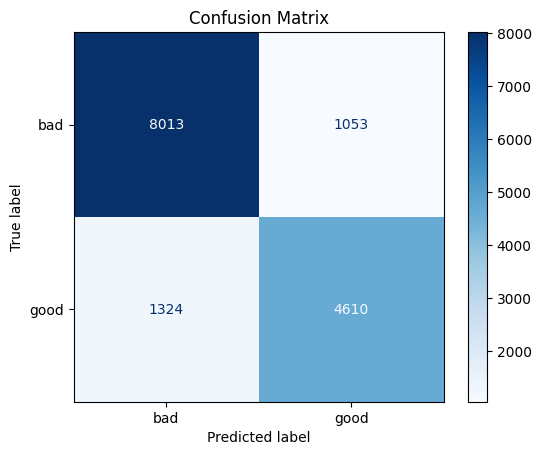

In [20]:
cm = confusion_matrix(y_testset, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()